### Blahaj Crypto Crash Course!

Hello! This `.ipynb` file contains a bunch of training materials for those lookng to improve in their Cryptography!

Quick self-introduction:
I'm `warri`, ctf player for about 3 years now. I mainly play in the Cryptography and Reverse Engineering categories and enjoy teaching.
I find that for ctfs the best way to learn is mainly through DIYs, thus this ipynb file serves to guide one and help them become better at Cryptography.

This training is heavily inspired by 
https://cryptohack.org/courses/, which is a really neat platform to learn Cryptography! Cryptohack also has a discord server full of active ctf players who can help you grow and improve too!

#### Training Contents


This `.ipynb` will cover the following topics in Cryptography, which I believe would be great starting places for newcomers who have already been familiar with traditional historical ciphers and base encodings:
- Expressing data as integers
- Modular Arithmetic
- RSA and Public Key Cryptography
- LCGs, OTPs and Randomness

That said however, it's best if one is already familiar with the following topics:
- Python programming
- Using Jupyter Notebook and/or using .ipynb files
- Bytes, bits, encodings (check out `tomato`'s lecture if you havent!)
- Xor operation (check out `tomato`'s lecture if you havent!)

This training will feature a lot of self directed learning and exercises, so feel free to ask in the discord server if you need help! We'll try our best to help out whenever we can.

#### 1. Data to Numbers

With the advent of computers, there has been a recurring theme of converting things to numbers. Why? Because
- Computers understand binary (1/0) and thus understand numbers
- Computers only understand things in binary
- Hence, computers don't actually understand things like `"HELLO"` or `ajkcjlvlevl` (unless they are represented as numbers)

Thus, when it comes to encrypting and decrypting information in the digital age, we need to know how to convert strings or bytes to numbers.

##### One Letter At A Time


But before we tackle `Hello world` and express that as a number, lets start with something small. Like a single letter (aka character).
Consider the character `a`. In the realm of computing, we've already have a standard for converting such values into numbers. We typically use whats called an [ASCII Table](https://en.wikipedia.org/wiki/ASCII) to represent text data as numbers.

The ASCII table takes the form of this:

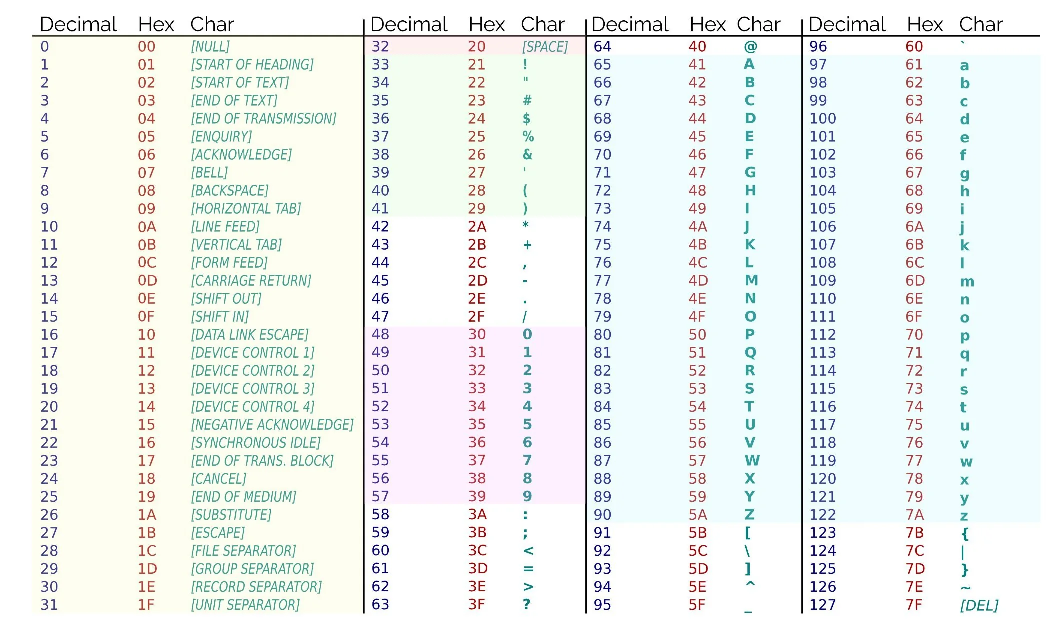

where each letter is given a decimal (or base-10) number mapping. As we can see,
`m` is mapped to the number `109`, 
`1` is mapped to the number `49`,
so on and so forth.

In Python, we can use the `chr()` and `ord()` functions to convert string characters to numbers and vice versa. Try it out!

In [8]:
# Exercise 1.1

print("ASCII number for the letter 'm' is", ord('m')) # should give 109
print("The letter that the number 49 represents is '", chr(49), "'") # should give '1'

# Write code below to answer the following questions
# Use Python to determine:
# 1. what's the ASCII number for the character 'Q'?
# 2. What letter or character does 60 represent in ASCII?



ASCII number for the letter 'm' is 109
The letter that the number 49 represents is ' 1 '


##### Multiple Letters

Now that we have single characters sorted, lets try to convert full on strings like `Hello world` to numbers!

You might notice that we use numbers from 0 to 127 to represent text on the ASCII table. In computing, we round this up to 256, which is 2**8. We do this so that we can use a single byte to represent a single character. Now, when it comes to representing a string like `'Hello world'`, we typically perform the following:

1. Starting from the last character, convert it into an 8-bit number (i.e. between 0 and 256) using ASCII or `chr()/ord()`
2. For subsequent characters, do the following but multiply it with 256**position_of_character

For example, the string `"abc"` would typically be represented as 
```py
ord('c') + ord('b') * 256 + ord('a') * 256**2
```
We multiply the subsequent characters with increasing powers of 256 so that the results of `ord('b') * 256` won't affect or influence the value of `ord('c')`. Just like how we represent numbers in base-10 (i.e. in ones, tens,hundreds, ...), we express strings in the form of base-256 integers!

This kind of encoding where we start with the last character and go in reverse is known as `big-endian`.
In `little-endian`, we start with the first character. i.e. `"abc"` in little-endian would be calculated as
```py
ord('a') + ord('b') * 256 + ord('c') * 256**2
```

In [ ]:
# Exercise 1.2
# Convert and express the following strings into numbers, using BIG-endian and using python
# "hello"  (448378203247)
# "aeiou"  (418313236341)
# "01BCx"  (206984856440)






Aside from using `ord()` and `chr()` Python offers other means of expressing strings and data as numbers.

Namely, there exist 2 ways to do so, both of which feature a reverse operation

Both of these methods also support the reverse operation, as we see below:

In [10]:
"""
1. 
int.from_bytes()
It's reverse operation is bytes.fromhex()
"""

x = int.from_bytes(b"ABCde", "big")     # 280284587109
print(x)
# You might notice tha there's a `b` before the string. This is because we are representing "ABCde" not as a string object but a bytes object, which is another form of encoding
# int.from_bytes() allows one to adjust the endianness between `"big"` or `"little"`

hex_x = hex(x)                          # '0x4142436465'
hex_x = hex_x[2:]                       # skip or remove the `0x` portion, so we get '4142436465'
x = bytes.fromhex(hex_x)                # b"ABCde"
print(x)

280284587109
b'ABCde'


In [11]:
"""
2. 
bytes_to_long() (requires installing the pyCryptodome library in Python
It's reverse operation is long_to_bytes()
"""

from Crypto.Util.number import bytes_to_long, long_to_bytes

x = bytes_to_long(b"ABCde") # also 280284587109
print(x)

print(long_to_bytes(x))     # b"ABCde"

# Unfortunately, this method only supports big-endian.

280284587109
b'ABCde'


##### Bytes as Lists

It should also be noted that when data is represented as bytes, Python treats them as if they are lists too.

Lists are basically a sequence of elements. For bytestrings, such as `b"ABC"`, Python generally treats them as `[ord('A'), ord('B'), ord('C')]`

This form of representation makes it easier for one to process bytestrings than strings, as when we need to convert a string to a number, instead of having to call `ord()` on each letter, Python has seemingly done it for us already.

In [18]:
bytestring = b"hello world"
print(list(bytestring))
for value in bytestring: # notice this prints each of the characters as if it's already been ord()-ed, thus making it easier to process than strings!
    print(value, end = " ")
print()

list_object = [89, 109, 111, 63]
print(bytes(list_object))
for integer in list_object:
    print(chr(integer), end = " ")
print()

[104, 101, 108, 108, 111, 32, 119, 111, 114, 108, 100]
104 101 108 108 111 32 119 111 114 108 100 
b'Ymo?'
Y m o ? 


This concludes our journey with converting strings, bytes and such data as numbers! In Modern Cryptography, this is especialy important as it allows us to manipulate these data as if they were numbers, which make way for most, if not nearly all of the currently used cryptographic methods.

#### 2. Modular Arithmetic

Majority of the content here is inspired from Cryptohack's own course in Modular Arithmetic. Check it out [here](https://cryptohack.org/courses/modular/course_details/)!

When it comes to cryptography, mathematics serves as a strong foundation to base one's understanding upon. Most of underlying cryptographic principles rely on problems that are deemed so hard to solve without certain information whereby its impractical to solve them.

Take for example the Enigma Cipher used in WW2. The reason why it is reputable is due to the fact that decrypting any ciphertext without the key (certain information) is hard, and it can take a lot of brute forcing to recover. Perhaps with brute forcing it might not be as hard today with the use of computers and their computing power, which might be why it's rarely used in today's world!

Instead, cryptographers have resorted to more sophisticated methods of finding hard problems to base cryptographic principles on. One such problem would be factoring numbers, which depending on certain numbers can be so hard that it takes an impracticably large amount of computing power to solve. By using this as a base for an encryption system, without the key (factorisation of the number), it becomes near-impossible to break the cryptosystem, thus achieving security. (you might recognise this as the basis for RSA!) These problems are known to be hard simply because their fields have had extensive study and research into. This is also why cryptography and mathematics mix together very often, as mathematics and logic ensure and lend substantiation (or proof) of the security of current cryptographic standards!

But of course, sometimes when using really large numbers we use up more bytes and more memory to store such data. Instead, we often work with modular arithmetic, where we do addition, multiplication and exponentiation such that it "wraps around" a modulus and returns back to zero. Think about clocks, and that how after 23:59 we reach 00:00 instead of 24:00.

It should be first acknowledged that mathematics can be an intimidating subject, and for many people, a deep dive into cryptography might be the first time someone is really motivated to start working with new areas of mathematics. Such was my journey into cryptography, and I believe the same can be said for so many other players both veterans and new.

This training section will offer a very simplified exploration into modular arithmetic. For a more full, concrete study, check out the corresponding course on Cryptohack!

##### Basic Modular Operations

In [ ]:
# Exercise 2.1

# Let's begin by having some familiarity with simple modular arithmetic
# Firstly, the `%` operation. In Python, this stands for `mod` or `modulo`
# Given 2 numbers {x,y}, x % y takes the remainder of x divided by y

print(5 % 3)
print(2 % 10)
print(189 % 177)
print(-9 % 4)

# Run these operations and see what comes out of it!
# One way to understand this is that 5 = 1*3 + 2, thus 2 is outputted as the remainder of 5 divided by 3
# 2 = 0*10 + 2, thus 2 % 10 returns 2 as well
# What about -9 % 4? Well, -9 = (-3)*4 + 3. 
# We use -3*4 as its the next multiple of 4 smaller than -9. Hence its remainder is 3.

# Onto basic addition, multiplication, and exponentiation with modular arithmetic in mind
# To do modular addition, we simply do addition as we do in Python, wrap the expression with a tuple and then use the % operation

print( (2 + 11) % 7) # 13 % 7 == 6

# Let's try computing multiplication and exponentiation
# Compute the following, all in mod 101:
# 88 * 111      (72)
# 5 ** 27       (25)
# 2 ** 99999999 (51)
"""
NOTE
When computing modular exponentiation, we can use `pow(base, exponent, modulo)`
If we do (base**exponent) % modulo, Python will first compute base**exponent which can often be really really big such that it crashes or takes too much time.
pow() bypasses this by always representing every number to be between 0 and the modulus
"""

# ENTER CODE HERE

##### Identities and Inverses


In [ ]:
"""
Author's note:

The section on Identities and Inverses isn't necessarily important with regards to most of the blahaj ctf challenges.
However, the concepts of Identity, Inverse and Order (to be covered later in RSA) appear very, very often in a lot of cryptosystems. \
These three terms are fundamental concepts in a study of mathematics called Group Theory.
Most Cryptography Protocols (Discrete Log, RSA, Elliptic Curves, Isogenies, Post-Quantum etc.) are based upon and uses concepts in Group Theory.
We hope this section gives you a brief idea and understanding of these terms which you would see a lot in your cryptography journey!
"""

For the remainder of this section let's focus on integers modulo `p`, where `p` is prime. This means that under all cases, we'll only be working with elements from `0, 1, ..., p-1` (why is p not an element in integers modulo p)?

In mathematics, the set of integers modulo `p` (i.e. `{0, 1, ..., p-1}`) contains certain properties with addition and multiplication. These properties allow for it to be defined as a [field](https://en.wikipedia.org/wiki/Field_(mathematics)), denoted $\mathbb F_p$. Among these properties what we are looking for are that there exist identity element and inverses.

An identity element of an operation `~`, usually denoted as `e`, is an element in the field whereby for any element `a` in the field, `a ~ e = a`.
For example, the identity element of modular multiplication (operation) in $\mathbb F_p$ is `1`. Because `x * 1 (mod p) == x (mod p)` for all elements `x` in $\mathbb F_p$. 

What's the additive identity for $\mathbb F_p$? (This identity element is true for any prime `p`, even including over the integers $\mathbb Z$!)

In [ ]:
# Exercise 2.2
# Enter answer here.
additive_identity = 

# To verify if your value is correct, just run this cell. If it prints True, then you're correct!
for i in range(0, 101): # we'll test if x is the additive identity in field F_101 by checking for all elements in F_101
    if (i + additive_identity) % 101 != i:
        print("False")
        break
if i == 100:
    print("True")

# If you're stuck, the answer is one of the integer value x that satisfies the following equation: x**2 - 9*x = 0

While a field may have a single identity element for a given operation, for every element in the field there exists an inverse element relative to it.
The inverse element of an operation `~` given element `a` in the field is some element `b` whereby `a ~ b = e`, where `e` is `~`'s identity element.

For example, in $\mathbb F_7$ (i.e. integers modulo 7), the multiplicative (~ = modular multiplication) inverse of 3 is 5.
This is because `3 * 5 (mod 7) == 15 (mod 7) == 1 (mod 7)`, and 1 as we know is the multiplicative identity in the field.

What's the additive inverse of `89` in $\mathbb F_{101}$?


In [ ]:
# Exercise 2.3
# Enter answer here. Make sure to run the previous cell first!
x = 

if (x + 89) % 101 == additive_identity:
    print("Correct!")
else:
    print("Wrong!")

It is important to note that sometimes, not all elements in `{0, 1, ..., p-1}` have a multiplicative inverse. This is in the case of `0`, as 1/0 is undefined and simply does not exist.

##### Fermat's Little Theorem


Now we will cover a interesting property when dealing with modular arithmetic. Let's use the field $\mathbb F_{17}$.

Calculate $\mathbb 3^{17}$ in $\mathbb F_{17}$ (`3**17 (mod 17)`)

Now try $\mathbb 5^{17}$.

What about $\mathbb 6^{16}$?

This interesting property is known as [Fermat's Little Theorem](https://en.wikipedia.org/wiki/Fermat%27s_little_theorem). This in particular becomes very relevant when we look at RSA Cryptography later on.

Using this theorem, can you derive the result of
$\mathbb 127321739817^{74284207957207465373522120721360312702695848919049358209993523889968181277960}$ in $\mathbb F_{74284207957207465373522120721360312702695848919049358209993523889968181277961}$ without using Python or any calculator?

In [ ]:
# Exercise 2.4
x = 

p = 74284207957207465373522120721360312702695848919049358209993523889968181277961
if pow(127321739817, p-1, p) == x:
    print("Correct!")

##### Modular Division



Now that we have identities and fermat's little theorem dealt with, we can introduce a concept that at first seems impossible in modular arithmetic - division.

Suppose we have the element `2` in $\mathbb F_{13}$ and wish to compute the equivalent of `2 / 3`. At first, this doesn't seem to make sense. `2/3 = 0.66666666...` which is not an integer, so how can it be some element in $\mathbb F_{13}$?

Recall how $\mathbb F_{13}$ is a field. We know that there exist a multiplicative inverse element for each element in $\mathbb F_{13}$.

Thus, if we have the multiplicative inverse of 3, (let this be some value `d`), we can multiply `2` with that. This is because:
```py
2 * d (mod 13) == 2 * (1/3) (mod 13)  (Because d * 3 == 1 mod 13)
               == 2 / 3     (mod 13)
```

So, in order to perform division in modular arithmetic, we first need to ensure that there exists a multiplicative identity of our divisor. (in integers modulo primes, all elements will have a multiplicative inverse except for 0. in integers modulo non-primes, not all non-zero elements have such an inverse)

We then compute said multiplicative inverse. Let's say we want to compute the inverse of some element `a` modulo `b`, where `b` is a prime.

`Fermat's Little Theorem` tells us that $a^{b-1} \equiv 1 \pmod{b} $. `1` also happens to be the multiplicative identity in $\mathbb F_b$.

We can rewrite $a^{b-1}$ as $a * a^{b-2}$. Thus, $a^{b-2} \pmod{b}$ is our multiplicative inverse of $a$ in $\mathbb F_b$. We compute `pow(a, b-2, b)` to recover our modular multiplicative inverse.


In [ ]:
# while pow(a, p-2, p) computes the multiplicative inverse of a mod p so long as p is prime,
# another way to compute the multiplicative inverse of a for any modulus b, (assuming such an inverse exists), can be done using pow(a, -1, b)

To complete our modular division, we multiply our dividend with the inverse, compute it with respect to our modulus, and voila, we've achieved division!

As an example, try computing `783 / 899 (mod 1867)`

In [ ]:
# Exercise 2.5
x = 

if (x * 899) % 1867 == 783:
    print("Correct!")

##### Modular Properties

Last but not least, lets wrap up our exploration into modular arithmetic with some properties that come with modulo addition and multiplication. (note that these properties also apply to modulo subtraction and division, as those are simply inverses of addition and multiplication)

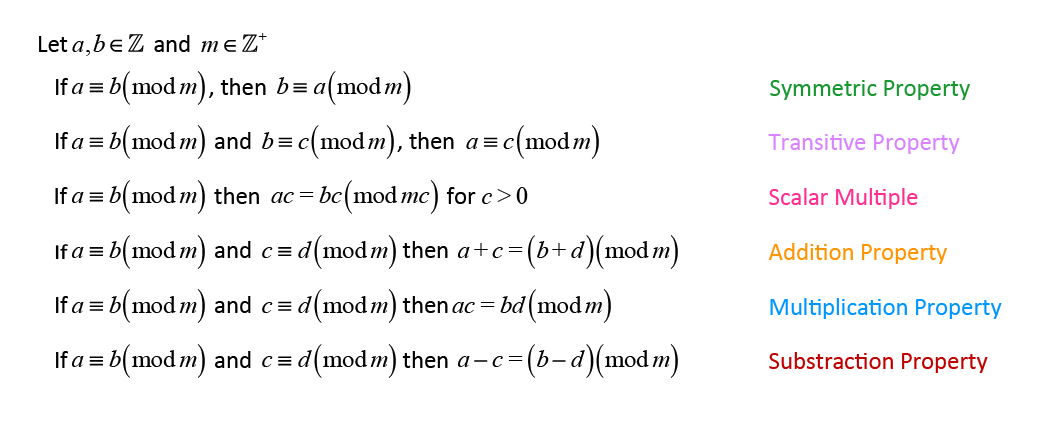

Image source: https://calcworkshop.com/number-theory/modular-arithmetic/

##### Practice Challenges

Here's a few sample challenges to test your understanding on modular arithmetic! Some of them are also styled as CTF challenges and will have flags represented as

`flag{STUFF_HERE}`

In [ ]:
# Challenge 2.1

flag = "ENTER_ANSWER_HERE"
check = (83, 103, 152, 172, 153, 192, 160, 162, 133, 103, 2, 123, 231, 162, 249, 222, 249, 212, 110, 113, 24, 231, 172, 160, 231, 241, 123, 123, 123, 74)
ptr = 0
for char in flag:
    test = ord(char) * 89 % 257
    if test != check[ptr]:
        print("Wrong!")
        break
print("Correct!")

In [ ]:
# Challenge 2.2 (slightly harder than 2.1)

# hint: How can you use Fermat's Little Theorem to reverse the encryption process?
prime_modulus = 94435841161543270151470329747880127763710513959305817685639532626729074484603
exponent = 17
flag = b"ENTER_ANSWER_HERE"
flag_as_integer = int.from_bytes(flag, "big")
ciphertext = pow(flag_as_integer, exponent, prime_modulus)
print("ciphertext =", ciphertext)

# Output:
# ciphertext = 37964558888474914917410527983735284234346224590588012121106610783278521310517

Solutions

Challenge 2.1
```
Each character of the flag is converted to its corresponding ASCII number and then multiplied with 89 modulo 257. 
We can perform modular division to reverse the multiplication and recover the flag back
```

Challenge 2.2
```
Since the modulus `p = 94435841161543270151470329747880127763710513959305817685639532626729074484603` is prime, 
we know from Fermat's Little Theorem that any integer `m**(p-1) % p == 1`.
This means `flag_as_integer ** (p-1) % p == 1`
So, we obtain the multiplicative inverse of `17 mod (p-1)`, and then do `ciphertext ** d mod p` where `d` is the inverse of 17.
```
```py
ciphertext ** d mod p == ( (flag_as_integer ** 17) ** d ) mod p
                      == ( flag_as_integer ** (17 * d)) mod p
                      == ( flag_as_integer ** (1 mod p-1)) mod p
                      == flag_as_integer
```
```
From there, we can convert the value back into bytes using `long_to_bytes()` or similar to recover the flag.
```

#### 3. RSA and Public Key Cryptography

This section was in part inspired from [the Cryptohack course on Public Key Cryptography](https://cryptohack.org/courses/public-key/course_details/)

In practice many networks that were public are insecure. One can easily use forensics and packet capture tools such as Wireshark, Snort among others to analyse and sieve through large amounts of data, making it easy to sniff on and eavesdrop upon plaintext communications.

It was not until Whitfield Diffie and Martin Hellman's 1976 paper "New Directions in Cryptography" coined the idea of public-key cryptosystems, digital signatures aong others, as the paper provided means to securely share secrets over insecure channels. But it was the RSA algorithm described a year later by mathematicians Rivest, Shamir and Adleman that was the first full public-key cryptosystem, where users can encrypt messages to recipients using a public key, such that it was only the recipient who could decrypt them. This section attempts to get one familiarity with this extremely famous cryptosystem.

##### Public Key Cryptography


Public-key cryptography, or asymmetric cryptography, is the field of cryptographic systems that use pairs of related keys. Each key pair consists of a public key and a corresponding private key. Key pairs are generated with cryptographic algorithms based on mathematical problems termed one-way functions. Security of public-key cryptography depends on keeping the private key secret; the public key can be openly distributed without compromising security. This paragraph was copied wholesale from the [wikipedia article covering the concept](https://en.wikipedia.org/wiki/Public-key_cryptography).

The idea behind a public key encryption system was to ensure confidentiality, in that only the intended recipients of an encrypted message could decrypt it. In a given network each user will be assigned a public-private key pair, whereupon the public key is distributed to everyone while the private key remained hidden. Anyone with a public key can encrypt a message, yielding a ciphertext, but only those who know the corresponding private key can decrypt the ciphertext to obtain the original message. That way, anyone else who had sniffed the encrypted message would not be able to decrypt it and view its contents.

The same kind of infrastructure was also used in signatures, in which it was used to ensure integrity. In a digital signature system, a sender can use their own private key together with a message to create a unique signature. Anyone with the sender's public key can verify whether the signature matches the message, but a forger who does not know the private key cannot find any message/signature pair that will pass verification with the sender's public key. Thus, upon receiving a message with an associated signature anyone can verify it to ensure the message had not been altered by anyone in transit, otherwise the signature would not be verified. A key example is in the [Digital Signature Algorithm](https://en.wikipedia.org/wiki/Digital_Signature_Algorithm), but for the sake of brevity it will not be covered here.

Such signatures also ensured non-repudiation. As only the sender can generate valid message-signature pairs, the sender cannot deny not having sent a message especially when their signature is on it and is valid.

We'll start off by covering RSA encryption.

##### RSA Encryption

RSA revolves around a public key and a private key.

The public key comes in the form of a large modulus `N` thats hard to factorise. Should `N` be easy to factorise, it becomes easy to decrypt it even without the private key. Normally, `N` is comptued in the form of `p * q`, where `p, q` are large primes. The large nature of the primes makes `N` difficult to factorise, thus ensuring that its infeasible or impractical to break the cryptosystem. The public key also includes an exponent, `e`. To encrypt a message, the sender converts their message to an integer `m`, then does `c = pow(m, e, N)`. `c` is then sent as the ciphertext.

The private key typically comes in the form of `d`, a private exponent. `d` shares a property with `e` in that for any integer `a` coprime to `N` (i.e. does not share a common factor other than 1), `a^(d*e) == 1 mod N`.

We will delve into how `d` is computed later, but in the meantime can you encrypt the following message?

In [ ]:
# Exercise 3.1
# Encrypt the message b"I_can_do_RSA" with the following parameters:
# Make sure to convert the message into an integer in big endian!
p = 73146507791077638047409212117919151465609851342354921625290281738238882161867
q = 69804840426560173329386513576650523756102180456894705105564015046517429588811
e = 65537 # typically this is the value used in RSA encryption
message = b"I_can_do_RSA"

def RSA_encrypt(message:bytes, p:int, q:int, e:int) -> int:    
    c = 0
    # Write code here!

    return c


c = RSA_encrypt(message, p, q, e)
if c == 2963716987027265727294444069902707250200517417684695768218314277204077296080122836894729571341779891494762867720162581788531121512290753095838616487061420:
    print("Correct!")

##### Orders and Euler Totients

As we explore how we can derive the private key `d`, let's recap what we've learnt back in Modular Arithmetic.

We know that when we deal with integers modulo primes, Fermat's little theorem states that for any element `a` in the field mod prime `p`, `pow(a, p-1, p) = 1 mod p`

Looking at RSA, we clearly are dealing with integers modulo non-primes, which unfortunately lacks the properties of a field. So Fermat's Little Theorem won't apply here. However, we can use a handy trick that `(a mod (xy)) mod x == a mod x` 

(this works for any `(... mod MODULUS_I) mod MODULUS_J` so long as `MODULUS_J` is a factor of `MODULUS_I`),

and shift our view from integers mod N ($\mathbb Z_n$) to the field of integers mod p ($\mathbb F_p$) and field mod q ($\mathbb F_q$) respectively.

In these two instances we can apply Fermat's Little Theorem to derive that for any `m` thats coprime to `N`, `pow(m, p-1, p) == 1 mod p` and `pow(m, q-1, q) == 1 mod q`.

Now another neat property - if an integer is `1 mod p` and `1 mod q`, it's `1 mod (p*q)`. We can demonstrate this with proof via contradiction.

In [ ]:
"""
Suppose x = 1 mod p, 
        x = 1 mod q, 
        x = (1 + y) mod pq for some non-zero integer y < pq (as 1+y is the remainder, so 1+y < pq)
    
Then x = k0 * p    + 1 
       = k1 * (pq) + 1 + y for some integer k0 and k1
Thus, k0 * p = k1 * pq + y
Because the LHS (Left Hand Side) is a multiple of p, this means y must be a multiple of p as well.

By similar logic, we show that y must be a multiple of q.

But then this mean y is a multiple of p and a multiple of q. 
So y must be a multiple of the lowest common multiple of p and q, which happens to be p*q (as both p, q are primes)

But we've shown earlier that y < pq, thus we face a contradiction
"""

# Hence, if x == 1 mod p and x == 1 mod q, x == 1 mod (p*q). QED

Since `pow(m, p-1, p) == 1 mod p` and `pow(m, q-1, q) == 1 mod q`, we have that 

`pow(m, (p-1)(q-1), p) == 1` and

`pow(m, (p-1)(q-1), q) == 1`

From before, this also implies that `m**((p-1)*(q-1)) == 1 mod N`.

Because raising any coprime number `m` to the exponent `(p-1) * (q-1)` gives 1 modulo `N` as we have discussed previously, this gives the number a...special property. Loosely speaking, we call the value `(p-1)*(q-1)` the `order` of the group of integers modulo `N`.

What exactly the `order` is doesn't particularly matter (it's actually the number of elements coprime to `N` among others), but we only need to be concerned that any number raised to this gives `1`.

There is a function that's used to derive this value for any integer `n`, and its called the [Euler Totient Function](https://en.wikipedia.org/wiki/Euler%27s_totient_function). The totient function of an integer `n` can be computed as follows:

1. Factorise `n` into its prime factorisation `p0^e0 * p1^e1 * p2^e2 * ....` for primes `{p0, p1, ...}` and exponents `{e0, e1, ...}`
2. For each `(p, e)` pair, compute `(p - 1) * p^(e0 - 1)` and save the value
3. Multiply all `(p - 1) * p^(e0 - 1)`s together, and thats the Euler Totient function.

In the context of RSA, the order or euler-totient also generally comes with another name. `phi`.

You might wonder why we went all this way to compute this magical number `(p-1)*(q-1)`, or perhaps have drawn the dots and seen how this leads into RSA Decryption. Without further ado~

In [ ]:
# Exercise 3.2a
# Given the p,q parameters from before, can you compute phi?
p = 73146507791077638047409212117919151465609851342354921625290281738238882161867
q = 69804840426560173329386513576650523756102180456894705105564015046517429588811
phi = ...

# To test if your value of phi is correct,
e = 17
d = 4805628521521237640732904272905440904633344598064570475256957302504625491078284318365367671073079681563279427000273658279727470102728873681321758345712433
if e*d % phi == 1:
    print("Correct!")

In [ ]:
# Exercise 3.2b
# What if my N = p**2 * q? Can you compute the value of phi?
p = 7880126025158255211226693418937127141200075654742038139312650867092466170480602274521437485707952786832178410441037964608400638492051853351783120081216339
q = 79216853910652461945154322544797683224513495415841975601416039409159184558187
N = p*p*q
phi = ...

# To test if your value of phi is correct,
e = 3
d = 2025503674269189990737830324788950953268534032326450523032972360764140260205111811939651686325099030473851327178748967497566810875177624267298329227171775627117696851966342093941925847565129315476730746303023645017078921658837176894472615592318560526357581813050211762133983517015022127816503591382904553876774661431772523821571692051675465069334422221770088100275103619749167634973045
if e*d % phi == 1:
    print("Corret!")

##### RSA Decryption



Provided we have the primes `p, q` that make up `N`, we can compute `d = pow(e, -1, (p-1)*(q-1))`. Performing `pow(c, d, n)` where `c` is the ciphertext recovers the initial value `m`.

This is because

```py
c ** d % n == (m ** e) ** d % n
           == m**(e*d) % n                          (See modular properties)
           == m**(k * (p-1)(q-1) + 1) % n           (Recall modular division)
           == ((m**(p-1)*(q-1)) ** k  *  m) % n     (See modular properties)
           == ((      1       ) ** k  *  m) % n
           == m % n
```

And that's why we went through such lengths to derive the `order`, or rather `(p-1)*(q-1)`!

In [ ]:
# Exercise 3.3
# Using the same (p, q, m, e) from before, with the ciphertext c back in Exercise 3.1 can you implement RSA decryption?

from Crypto.Util.number import long_to_bytes 
# if the above import fails, run the following command:
# pip install pycryptodome

c = 2963716987027265727294444069902707250200517417684695768218314277204077296080122836894729571341779891494762867720162581788531121512290753095838616487061420
p = 73146507791077638047409212117919151465609851342354921625290281738238882161867
q = 69804840426560173329386513576650523756102180456894705105564015046517429588811
e = 65537 # typically this is the value used in RSA encryption

def RSA_Decrypt(c:int, p:int, q:int, e:int):
    m = 0
    # Write code here
    return m

m = RSA_Decrypt(c, p, q, e)
print(long_to_bytes(m))

You might notice the above exercise gets one to derive `d` from `p` and `q`. This is essentially the `keygen()` part of RSA! You can often see this in many RSA related challenges.

##### RSA Signing

As mentioned before, public key cryptosystems aren't just used for encrypting but can also be used for signing. RSA also supports a signature scheme using one's public and private key as follows:

Suppose a sender sends a message (as integer) `m` to a recipient.

The sender first encrypts `m` using the recipient's public key, and hashes `m` using a hash algorithm, say `SHA256` for example. The sender then uses the sender's private key to encrypt the hashed message, getting a signature `s`. Both `s` and encrypted message are sent over. The receiver uses their own private key to decrypt the message.

To verify, the receiver uses the sender's public key to decrypt the signature recovering the hash of the message data. The receiver also recovers the message data by decrypting the encrypted message sent by the sender. By hashing the message data, the receiver can check this with the hash derived from the signature and thus verify and ensure that the (message, signature) pair must come from the sender!

As a demonstration we'll use `Ns, es, ds` as the sender's public and private key data and `Nr, er, dr` as the receiver's public and private key data.

The sender knows: `{Ns, es, ds, Nr, er}`, and sends:



In [ ]:
Ns, es, ds = ...
Nr, er, dr = ...
m = ...

def H(msg):
    ...
    # hash function stuff


# Sender computes:
enc_message = pow(m, er, Nr)
signature = pow(H(m), ds, Ns)
# where H is the hash function. Note that if no hashing is done, it is possible to decrypt and recover the message contents!


# Anyone can simply perform
hsh = pow(signature, es, Ns)
# and then compare it with
H(enc_message)
# if the two values are the same, then the signature is valid! Else, the message is likely forged or altered and not from the sender.



# Meanwhile, only the receiver can perform
message = pow(enc_message, dr, Nr)
# to recover the sender's message data!

##### Practice Challenges

The following challenges are standard beginner friendly RSA challenges that appear every once in a while!

Some handful python libraries:
- gmpy2.iroot() takes a number and can computes it to the power of 1/n, approximately. I use it very often to compute square roots, cube roots etc.!

For example:

In [11]:
from gmpy2 import iroot
print(iroot(48, 3)) # (mpz(3), False). False as 48 is not a cube number; 3 is returned as it is the maximum integer such that 3**3 < 48 (4**3 = 64 which is greater)
print(iroot(256, 8)) # (mpz(2), True). True as 256 is some number to the power of 8, in this case being 2!

# We can also convert the mpz() as integers using int()
# For example, 
a, b = iroot(100000, 5)
a = int(a)
print(a, b)

(mpz(3), False)
(mpz(2), True)
10 True



A frequent ctf player may notice that among the challenges here a very very common RSA challenge trope is not seen here...could it be used for blahajctf?

In [ ]:
# Challenge 3.1
# RSA with a suspicious key generation...

from Crypto.Util.number import getPrime, bytes_to_long
from secret import flag

def keygen():
    N = 1
    while N.bit_length() < 1024:
        N *= getPrime(12)
    return (N, 65537)

pubkey = keygen()
m = bytes_to_long(flag)
c = pow(m, pubkey[1], pubkey[0])
print(pubkey)
print(c)

"""
(379923244024688123710512571902361345676765704936594999395047159505478821117999161077983364901126887863326127762294339140507665468254068338627435196977091078003024993284059864530432660659843008027469095278688257284590520131092517571779001021655598769346597348693770131102157760706683633106112107022506087879301, 65537)
203323532343646385587128011894252286372239861601034652515124544138041166612877682621207501455235710708352685676321774566300504635371964002546724250206379045070903681354096858156152556337757190824433100905066014081992908484513167112265696451479427597530220147256809313153529074629956688843091041450185539988390
"""

In [ ]:
# Challenge 3.2
# RSA with some part of p known...kinda!

from Crypto.Util.number import getPrime, bytes_to_long
from secret import flag

p, q = getPrime(512), getPrime(512)
N = p*q
m = bytes_to_long(flag)
e = 0x10001
c = pow(m, e, N)
hint = p**2 + getPrime(524)
print(f'{N = }')
print(f'{c = }')
print(f'{hint = }')

"""
N = 101476486015994157806273872236213982440696328392776694354252106115505664904030752583196860094908152860631034328474830994993704190608387440222760511506341610375599661341719689723888773916028819346928694121651737120925045341633610560221481280479776445458681864182323885256555912170904658696288279533252991802499
c = 28757584882801167683450307338356887745400951601620071588196710281162048238920920268197094436490211103018948827354462946158152794409492194766117855240417328212537591558939903857964704065534460464137168917171642924978972972904027523029321143418635955125018601373651157877102764990488648939687757796599987630711
hint = 107439194280010072206854034377435623504447954270235380543693667060031963127002486211192182874116512626423477925949150148225086203020422182849310534067706038330047205682703924488862951752326249162845946883487545114530389402307272920163495349507917553295411751428981017333419084265976358843815115160612697519430
"""


In [ ]:
# Challenge 3.3
# Earlier I said RSA Signing without hashing is insecure...can you prove me right by recovering the message?

from Crypto.Util.number import getPrime, bytes_to_long
from secret import flag

def keygen():
    e = 65537
    while True: # this is actually a common safeguard implemented in RSA
        p, q = getPrime(512), getPrime(512)
        phi = (p-1) * (q-1)
        if phi % e == 0: # if e is a factor of phi, the multiplicative inverse of e modulo phi would not exist!!
            continue
        break
    d = pow(e, -1, phi)
    return p*q, e, d


# Sender, Receiver computes their own keys and broadcasts the public keys to everyone
Ns, es, ds = keygen()
Nr, er, dr = keygen()
print(f'{Ns = }')
print(f'{Nr = }')
print(f'{es = }')
print(f'{er = }')

# Sender computes ciphertext and signature
m = bytes_to_long(flag)
ciphertext = pow(m, er, Nr)
signature = pow(m, ds, Ns) # no hash function!
print(f'{ciphertext = }')
print(f'{signature = }')

# Receiver verifies received data
message = pow(ciphertext, dr, Nr)
hsh_message = pow(signature, es, Ns)
assert message == hsh_message

"""
Ns = 167682976600326696757096822072417434119880479827912607750559625800652999585360765548931419131171637066589787914944066660169304686959923164246793274711901638408419486213681542095341148152939181868226747555757702101034042881530151956053519921362479448289075992874738371380239457220887572026645155371817353006839
Nr = 87398542060457757422602471761554453890045145347849566997562780983435558880343242241665490911342315769184110279408093962246519836760334739544050941133129145990643618111154343694510640943881244011897842274771452956193487771760582414713324870068941972788411389296445216491446470971325076744633171036011896622577
es = 65537
er = 65537
ciphertext = 47311820687742567409515184999423864954060085335841708146587894661788358931043767329584615799789580585280953961684132629494274147721495606194380021026168617289410392373223228106634788522674626501238863707361243094755189239276347220516173021025564132730870289454039915479177730892974676145662849695326338118299
signature = 37534777961919837812685444663433418926110720863277582931485821252649761776406566775043465938004507164287842083808534958925447998890594214490566859540204076613853374261308521135579038942785491808195302971565328000898024782724020924479097100115531261386936464898199552606427370073730291191910432485311812761379
"""



Solutions

Challenge 3.1
```
N in this case is obtained by multiplying a bunch of small primes. Thus we can recover the prime factorisation of N by bruting through all 12-bit primes.
We then compute the euler-totient of N,and use it to derive the private key d to decrypt the ciphertext.
```

Challenge 3.2
```
We're given regular RSA with a hint being p^2 + some 524-bit integer.
The trick here is to notice that since p^2 is 1024-bits, the 524-bit integer while obscuring data from p^2, fails to offset the value of sqrt(hint) from sqrt(p^2).
We can use gmpy2.iroot() to compute the square root of hint, then slowly subtract it by 1 until we find one that;s a factor of N.
After which we can then compute the euler-totient and hence decrypt the ciphertext!
```
Challenge 3.3
```
As the message is not hashed in the signature, we can compute `pow(signature, es, Ns)` to recover the flag.
```

#### 4. LCGs, OTPs and Randomness

This last section of the relatively short self-directed training will feature other cryptographic algorithms that are present in the upcoming ctf. All of these mainly fall in a category in that they're mostly used to generate randomness.

Randomness is crucial in cryptography because it underpins the security of many cryptographic operations and prevents predictable patterns that attackers could exploit. Consider RSA, whose security lie in picking primes p,q such that n = p*q is hard to factorise. Suppose the generation code to get a 256-bit prime value performs the following steps:

1. Start with previous output x
2. Multiply x by 3
3. Modulo x with 2^256
3. If the new result is not a prime, repeat Steps 2. and 3.
4. Output new prime, save the new prime as the next "previous output"

Such an algorithm becomes super predictable. If we know a prime value that was generated from the above function, we can then simulate and obtain the next primes generated by this. Now, the next `p` generated by the algorithm would be predicted and thus, the security of the keys would be compromised.

Take ECDSA, or the Elliptic Curve Digital Signature Algorithm for short, where the signing algorithm generates a random nonce value `k`. If even one third of the bits of `k` is known, biased or recoverable, the private key `d` used in the algorithm can be fully recovered given enough signature pairs! This can happen in cases where the coder uses a random 160-bit generator to obtain `k`, when `k` can actually range from `0` to `2^256`. [Feel free to check this writeup here which elaborates it and ECDSA in greater detail](https://github.com/Warriii/CTF-Writeups/blob/main/tfc24/crypto_biased_elections.md) 

When it comes to using randomness in practice, we generally look for functions where all possible outputs have an equal or uniform chance of occurring. With minimal bias, it can be infeasible for an attacker to try and predict future outputs even if they know the full random function or algorithm. However, in a world where computers can only perform 1s and 0s and adhere to strict logic and mathematics, it is very difficult for one to simulate such true randomness. Instead, cryptography often relies on pseudorandom number generators (PRNGs) designed to produce sequences that are statistically random and unpredictable given any feasible computation time, making them secure enough for cryptographic purposes.


We'll be covering 3 ways in which such pseudorandomness can be generated or applied in modern cryptography, namely LCGs (Linear Congruential Generators), OTP (One-Time = Paddings) as well as Python's own Random library.





##### LCGs

Linear Congruential Generators (LCGs) are simple and widely used algorithms for generating sequences of pseudorandom numbers at minimal cost to processing time and memory. It's defined by a recurrence relation and operates based on a few key parameters. LCGs are fast and produce reasonably good pseudorandom numbers if the parameters are chosen carefully.

Generally speaking, 
An LCG generates a sequence of numbers according to the following recursive formula:

$X_{n+1} = (a X_{n} + c) \mod m$

To initialise an LCG, one supplies the following parameters which are generally constant.
- Seed ($X_0$): The initial value (starting point) of the sequence, chosen to "seed" the generator. Different seeds produce different sequences.
- Modulus ($m$): The maximum possible range of values. The numbers generated by the LCG ($X_1, X_2, ...$) will lie between 0 and $m - 1$
- Multiplier ($a$): A factor that affects the recurrence pattern and the sequence's randomness.
- Increment ($c$): An additive constant that can help ensure that the generated sequence does not repeat too soon.

As an example, let's initialise an LCG with the following parameters:
```py
m = 16
a = 5
c = 3
x0 = 7
```

We can then calculate subsequent outputs as follow:
```py
x1  = (5 * 7 + 3) % 16
    = 6
x2  = (5 * 6 + 3) % 16
    =​ 1
x3  = (5 * 1 + 3) % 16
    = 8
```

This gives us an LCG that outputs pseudorandom outputs in sequence, from `7,6,1,8,...`

Leaving it running we'll find that it will produce the sequence `7 6 1 8 11 10 5 12 15 14 9 0 3 2 13 4`, before going back to `7`, and then repeating the same pattern again. The cycle in this case has length `16`, and we can (loosely) say that the sequence has `order` 16.

One might notice that it is, predictable given the same outputs over and over again, as it repeats in a pattern or cycle. This is a cost that comes with the algorithm but it's offset by its 
- simplicity (easy to implement and very fast in software)
- deterministic (same seed will always yield the same sequence for reproducibility)
- efficiency (low memory, processing overhead)

In fact, LCGs are used in many applications today for pseudorandomness. In video games like Minecraft, LCGs are used to simulate randomness be it loot tables, structure generation, etc. While this may prove [insecure in certain cases](https://github.com/spawnmason/randar-explanation), LCGs still have some use for cryptographic protocols.

The weaknesses in LCGs lie when their pattern cycle (number of times one runs it before it repeats itself) is super short, or if one is able to recover the secret `{x0, m, a, c}` parameters used when it is initialised. Let's demonstrate this with a sample exercise/challenge:

In [ ]:
# Exercise 4.1

m = 2**31 - 1 # prime!
a = ??????? # unknown. Write the value of a here if you think you've found it!
c = 8713

def next(x):
    x = (a * x + c) % m
    return x

x = 123456789
x1 = next(x)
x2 = next(next(x))
print(x)    # x = 123456789
print(x1)   # x1 = 1399044568
print(x2)   # x2 = 299749038

# Can you recover a from x, x1, x2?
if x1 == 1399044568 and x2 == 299749038:
    print("Correct!")

We can solve the above problem by writing down equations of what we know. 

We have that
```
x1  = a * x + c
x2  = a * x1 + c
Thus,
(x2 - x1) = a * (x1 - x)
We compute the modular division of a * (x1 - x) with (x1 - x) under mod m. This lets us recover a (2891623)
```

In the case where the user has access to `{x0, m, c}`, and the full values of consecutive values `x1` and `x2`, the user can derive `a`.

If the user is able to derive `{a}`, the user can then copy or model the entire LCG over and run it on their side. This would allow them to predict future outputs generated by the generator. If the same generator is used in generating random numbers for a private key, the user can then simulate it on their side to predict the next private keys as well!

In order to circumvent this weakness, implementations using LCG tend to keep the `m, a, c, x0` parameters hidden. They may also only give the users truncated outputs of the next states `x1, x2, ...`

For example, if my LCG takes a 256-bit $x_i$ state and uses it to generate a 256-bit $x_{i+1}$ state, I can provide the last 16-bits of $x_{i+1}$ to the user.

In [ ]:
# We can implement truncation like this, for example
def next(x):
    x = ((a * x + c) % m) % 2**16 # takes lower 16 bits and outputs it to the user
    return x


That way, an attacker will only know the last 16 bits with each lcg output, which makes it even harder, possibly infeasible under the right circumstances to recover the lcg.

##### OTPs

OTPs, otherwise known as One-Time-Pads, is an application of randomness in encryption.

Theoretically unbreakable when used correctly, otps involves using a truly random key that is as long as the message, and it encrypts by combining each bit or character of the plaintext with a corresponding bit or character of the key using a simple operation, typically XOR (exclusive OR). For the rest of the training material we'll use XOR as the simple operation.

Given a message of say, length `n` bytes, an `n` byte key is generated accordingly, following which both key and message are xored together, producing a ciphertext.

The xored ciphertext as wel as the `n` byte key is returned as a pair. The `n` byte key must be kept private and is used to xor the ciphertext back to decrypt it and obtain the message, as the XOR operation is reversible; If `a XOR b == c`, then `c XOR b == a`.


In [ ]:
# Exercise 4.2
# Let's do a quick exercise; How do we decrypt an OTP-encrypted message given the key and ciphertext?

from os import urandom # we'll use Python's os library to generate random bytes

def OTP_Encrypt(message:bytes):
    key = urandom(len(message))
    ciphertext = b""
    for i in range(0, len(message)):
        ciphertext += chr(message[i] ^ key[i]).encode()
    return (ciphertext, key)

message = b"hello_world!"
ciphertext, key = OTP_Encrypt(message)
print(f'{ciphertext = }')
print(f'{key = }')

def OTP_Decrypt(ciphertext:bytes, key:bytes):
    output = b""
    # WRITE CODE HERE
    #
    #
    return output

decrypted_message = OTP_Decrypt(ciphertext, key)
if decrypted_message == message:
    print("Correct!")


It should be noted that the key:
- Must be TRULY random; Each possible key value (usually a byte from 0 to 256) **MUST have an equal chance of appearing**. Otherwise the message can be derived given a large amount of ciphertexts each xored with a different key. Why? we'll leave it to you to figure it out :)
- The key used must be only used ONCE and kept absolutely secret. Since should the key be known an attacker can decrypt the appropriate ciphertext.

The encryption method is theoretically unbreakable as it is not possible to break a xorkey that's the same length as the message. With just a ciphertext, there will always exist a xor key that decrypts said ciphertext to any message! Consider a 1-byte ciphertext 99. If the message is say, 41, then the xor key could be `41 XOR 99 = 74`. If the message were to be 42, then the key would be `73`, etc. Thus it is impossible to decrypt the ciphertext without knowledge of the key.

However, should the key be reused, an attacker with a known plaintext-ciphertext pair can use the pair to recover the key, and then use it to decrypt other messages xored with the same key. Hence the `One-Time` in `One-Time-Pads`. (`Pads` refers to how the xor key is padded to have the same number of bytes as the message!)

OTPs are used due to their Perfect Security and Simplicity. So long as the key generation is random enough to be unpredictable, it is impossible to break it.

However, there are many downsides to this, notably the need to securely distribute the key between sender and receiver. Moreover, the sender and receiver must securely store and manage large quantities of random key data equal in length to every message that they send. Moreover, it is difficult to achieve true randomness. All of these contribute to the rare use of OTPs in modern applications that require frequent communication and manageable key sizes. It does remain valuable in very high-security contexts, such as diplomatic or military communications, where absolute security is paramount and key distribution can be carefully managed.

##### Python Random

We'll end off the lecture portion of this segment with a brief touch on Python's own random library.

Python provides one with its own `random` library, which allows for one to generate random numbers. Functions such as `randint()`, `randrange()` and `getrandbits()` allows for pseudorandom generation of numbers.

In [ ]:
import random

print(random.randint(1, 11))        # random number between 1 and 11 inclusive
print(random.randrange(278, 999))   # random number between 278 and 999, excluding the boundaries
print(random.getrandbits(24))       # gets a random 24-bit number

An advantage with Python Random is that it can be determinisitic. Using `random.seed()`, we enable subsequent random.rand... calls to always output the same values.

In [5]:
import random

random.seed(1678) # for example
print(random.randint(1, 99999999999))
print(random.randint(1, 99999999999))
print(random.randint(1, 99999999999))

random.seed(1678)
print(random.randint(1, 99999999999)) # they're all the same!
print(random.randint(1, 99999999999))
print(random.randint(1, 99999999999))

49652357642
8280041066
80401682693
49652357642
8280041066
80401682693


We can also do this by setting the random Mersenne Twister state directly, using `getstate()` and `setstate()`.

In [4]:
import random

random_state = random.getstate()
x = random.getrandbits(512)
random.setstate(random_state)
y = random.getrandbits(512)
print(x)
print(y)

4682616817710788609936960974552016191626983902775995883336084054674015558193569043584119017312970521414451569671411457383829000517595173304204097011779014
4682616817710788609936960974552016191626983902775995883336084054674015558193569043584119017312970521414451569671411457383829000517595173304204097011779014


But alas, Python random is not true random. The random library actually uses the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister)(MT) algorithm.

Upon initialisation, the twister uses the seed provided (otherwise a random value) to initialise a 19937 different 1/0 bits in its state, which it then uses to generate 32-bit random values. With each value generated the states themselves also change accordingly. Each `randint`, `randrange`, `getrandbit` etc. call will use the 32-bit random value(s) (multiple values are generated if necessary) from the Mersenne Twister and then format the data accordingly. You can actually see how Python format's the data by going into the random library's source code!

In summary, when someone makes a call from the `random` library, python and its underlying c code moves from:

SEED (if provided) -> INITIALISE 19937-bit MERSENNE TWISTER STATE -> USE INTERNAL STATE TO GENERATE SEQUENCE OF PSEUDORANDOM DATA


A weakness in the Mersenne Twister is that the algorithm is what one might call a [linear transformation](https://en.wikipedia.org/wiki/Linear_map) across 19937 independent 1/0 bits. What this means is that the value of any bit in the MT state exerts a unique influence on the output of the random data. This means that in theory, if one is able to gather enough *consecutive* `getrandbit(32)` calls, one can reverse the data to find a single unique MT state that generated these 32-bit values.

The online tool [randcrack](https://github.com/tna0y/Python-random-module-cracker) for example, takes in 624 consecutive `getrandbit(32)` calls and uses them to derive the mersenne twister state. There exist many other tools and scripts online that go a step further and provide possible seeds that produce such a state.

But the thing is, you don't actually need 624 consecutive `getrandbit(32)` calls. If you know partial data from consecutive `getrandbit(X)` calls (or equivalent if `randint`, `randrange` etc. is used), you can set up a matrix mapping the effect of each of the 19937 0/1 mersenne twister state bit to the output of the partial data. Once that matrix is set up, you can compute the inverse of the matrix to recover a 19937 bit array representing a mersenne twister state that will produce the same calls as observed. This allows for one to predict future `getrandbit(32)` calls with pinpoint accuracy, provided enough data has been gathered.

While I have yet to make a writeup that fully performs the method described above, I can offer [this](https://github.com/Warriii/CTF-Writeups/blob/main/nus_greyhats/greywelcome_23/CryptoWriteups.md) instead, where `z3`, a symbolic equations solver, was used alongside the mapping matrix to recover the random MT state in order to break a OneTimePad implemented using Python's random library. (Credits for this goes to JuliaPoo from greyhats for assisting me tremendously with the upsolve). 

That said, I do intend to make a writeup that's much simpler without the use of z3 from the challenge `seedy` in `VSCTF24`. Should I churn it out in time I'll replace the link in this ipynb file with that instead!

There are also other means of breaking Python random. One such article by [Stackered](https://stackered.com/blog/python-random-prediction/) explains the random seeding and state to getrandbit(32) call process in great detail, and how with knowing certain getrandbit(32) calls one can in fact predict or guess (with about 50% accuracy) a future getrandbit(32) call.

It should be noted that Python random is breakable if the `getrandbit()` data is consecutive. When calling `randint()` or `randrange()` with non-perfect boundary values however, there is a chance where the library will make and drop `getrandbit()` calls. This actually makes reversing and figuring the MT state a lot harder, but it is still possible! This was from a very recent ctf that I'd played in, `ISITDU Qualifiers` and I'll update the ipynb file with the writeup link when I'm done!

##### Practice Challenges

In [ ]:
# Challenge 4.1 - LCG with c unknown
from random import getrandbits

m = 2**31 - 1
a = 12718789
c = ??? # try to recover this value from the provided x0, x1, x2 values!
x0 = getrandbits(32)

next = lambda x: (a*x+c) % m

x1 = next(x0)
x2 = next(x1)

"""
x0 = 1194104515
x1 = 686271452
x2 = 35570997
"""

In [ ]:
# If you're submitted value of c is correct, then this should give the flag!
from hashlib import md5

xor_key = md5(str(c).encode()).digest()
ciphertext = b'\xea\x08\xa8\x8eZ\xfb\x8c\xb9\x03\xff8`\xfd{|\xd2\xe5\x14\xbc\x85`\xe2\x8d\xb2\x18\xb2$'
plaintext = []
for p, i in enumerate(ciphertext):
    plaintext.append(i ^ xor_key[p % len(xor_key)])
print(bytes(plaintext))

In [ ]:
# Challenge 4.2 - LCG Reversal. Reverse the LCG and obtain the state before it!
m = 2**31 - 1
a = 12718789
c = 424241
x0 = ????

next = lambda x: (a*x+c) % m
x1 = next(x0)
"""
x1 = 258485541
"""

if next(x0) == 258485541:
    print("Correct!")


In [ ]:
# Challenge 4.3 - One Time Pads with key reuse
from os import urandom

my_onetimepad = urandom(48)

def encrypt(message):
    assert len(message) < len(my_onetimepad)
    output = []
    ptr = 0
    for i in message:
        output.append(i ^ my_onetimepad[ptr])
        ptr += 1
    return bytes(output)

flag =          b"flag{??????????????????????????}"
hello_message = b"i can do this i can do this i can"
ciphertext = encrypt(flag)
encrypted_hello = encrypt(hello_message)

print(f'{ciphertext = }')
print(f'{encrypted_hello = }')
"""
ciphertext = b"{\xc2\xeeV'\xb1\x1a\xf6\xbb\x11f\xaaQ\xa4\xa7\xc22T-\x89\x99\xe8\x92#\xb0$\xcb\x9b\xaf\x18(&"
encrypted_hello = b't\x8e\xecP2\xf5N\xf7\xef:e\xf0[\xdb\xbc\x87$\x00&\xf6\x8a\xb6\xc6?\x87"\xcc\xeb\xb5\x19j:\x14'
"""

In [ ]:
# Challenge 4.4 Breaking Python Random (hint: Randcrack)
# You'll need to run this code, and to solve the challenge show that you can get a "Correct!" output

from random import getrandbits, randint

flag = b"flag{randcr4ck_g0_brrrr}"
output = [getrandbits(32) for i in range(624)]
next_value = randint(91238237, 485735834107177348)
print(f'{output = }')

your_guess = int(input(">> "))
if your_guess == next_value:
    print("Correct!")

Solutions

4.1
```
x1 = a*x0 + c
We have x1 and x0, so we just need to compute (x1 - a * x0) mod m to obtain c
```
4.2
```
The LCG uses the formula: x -> a*x + c
So we can reverse it by doing x -> (x - c) * inverse_of_a (mod m)
```
4.3
```
Xor encrypted_hello and hello_message to recover my_onetimepad
Then use my_onetimepad and xor it with ciphertext to recover the flag!
```
4.4
```
We can use Randcrack to recover the random state and then predict the next output!
See below code for implemenation
```

In [ ]:
import random
from randcrack import RandCrack

output = [random.getrandbits(32) for i in range(624)]
rc = RandCrack()

for i in range(624):
	rc.submit(output[i])

next_value = random.randint(91238237, 485735834107177348)
my_guess = rc.predict_randint(91238237, 485735834107177348)
print(next_value)
print(my_guess) # both of these are the same!